### Name:

<pre> Maryam Mohseni </pre>

#### 1) blu Marketing
The small city of blufield has a total number of 8,000 families. Each family lives in a house.
These houses are distributed over a square shaped area of 5000 by 5000 meters by the following distribution: 1) ¼ of the houses are distributed normally (mean in center) in a 2000-by-2000 square in the center. With SD=500 meters. 2) The remaining ¾ are distributed normally (mean in center) all over the city with SD=1250 meters.
Blu, as an online bank, wants to see how much people spend on transportation to a regular bank. Assume the banks are located in the following locations:
A: 2000, 2500
B: 4200, 4000
C: 3500, 500
D: 1000, 4200
E: 700, 500
When going to a bank, people choose the nearest bank available. If it is less than 500 meters away, it would cost 1 unit of money to get there, if it is less than a kilometer away it costs 3 and otherwise it costs 5 units of money to get there. 

In [1]:
import numpy as np
import pandas as pd

# To make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

(6000, 2)


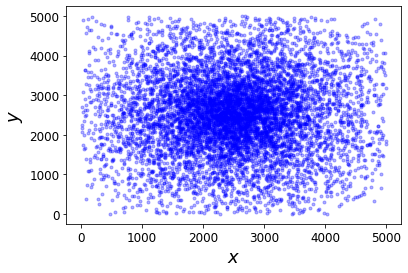

In [2]:
m=8000
data1 = np.random.normal(0, 500, (2000,2))
i=0
List=[]
# For 3/4 houses that are distributed normally around the center with SD=1250, we should
# make sure that they are located within the square of 5000 by 5000!
while i<12000:
    r = np.random.normal(0, 1250)
    if abs(r) <= 2500:
        List.append(r)
        i=i+1
data2=np.array(List)
data2=data2.reshape(6000,2)
print(data2.shape)
data = np.r_[data1, data2] 
data=data+2500
x=data[:,0]
y=data[:,1]
plt.plot(x, y, "b.", alpha=0.3)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.show()

In [3]:
banks=np.array([[2000, 2500],
              [4200, 4000],
              [3500, 500],
               [1000, 4200],
               [700, 500]])
banks[0,:]

array([2000, 2500])

Next, we plot the houses and the banks, and fill the areas with different costs with different colors. For the houses located in red areas, the transportation cost is 1 unit of money. For the houses located in green areas, the transportation cost is 3 units of money and finally the houses in white areas should pay 5 units of money to go to the bank.

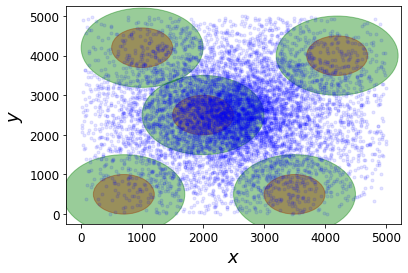

In [4]:
plt.plot(x, y, "b.", alpha=0.1)
circle1 = plt.Circle(banks[0,:], 500, alpha= 0.4, color='r')
circle2 = plt.Circle(banks[1,:], 500, alpha= 0.4, color='r')
circle3 = plt.Circle(banks[2,:], 500, alpha= 0.4, color='r')
circle4 = plt.Circle(banks[3,:], 500, alpha= 0.4, color='r')
circle5 = plt.Circle(banks[4,:], 500, alpha= 0.4, color='r')
circle6 = plt.Circle(banks[0,:], 1000, alpha= 0.4, color='g')
circle7 = plt.Circle(banks[1,:], 1000, alpha= 0.4, color='g')
circle8 = plt.Circle(banks[2,:], 1000, alpha= 0.4, color='g')
circle9 = plt.Circle(banks[3,:], 1000, alpha= 0.4, color='g')
circle10 = plt.Circle(banks[4,:], 1000, alpha= 0.4, color='g')

fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)
ax.add_artist(circle7)
ax.add_artist(circle8)
ax.add_artist(circle9)
ax.add_artist(circle10)

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.show()

Using this information, answer the following:
1) In which areas of the city should blu focus on advertising about how using blu would decrease transportation costs more? Provide a heatmap.

First, we calculate the distance of each house to all of the 5 banks.

In [5]:
Distance=np.zeros((m,5))
for i in range(m):
    house = data[i,:]
    for j in range (5):
        bank = banks[j,:]
        Distance[i,j] = np.linalg.norm(house-bank)
print(Distance)
Distance.shape     

[[ 500.50737758 2456.19152193 2936.60423502 1536.0305246  2797.11972284]
 [ 989.31258857 2739.64026344 1513.83031513 2951.68069236 2307.38423708]
 [ 852.17668117 2100.4691963  3105.95855543 1493.37293765 3204.20003161]
 ...
 [1388.94516001 3142.77790589 1150.92084872 3360.25306054 2090.78437256]
 [ 913.26822919 1806.74161446 2862.43360982 1861.30052821 3294.96655241]
 [1867.66539777  802.34638523 2977.58605735 2691.42395436 4150.02123404]]


(8000, 5)

Then, we convert distance to cost based on the values given in the question.

In [6]:
Cost1=np.where(Distance<500, 1, Distance)
Cost2=np.where((Cost1<1000) & (Cost1>=500), 3, Cost1)
Cost=np.where(Cost2>=1000, 5, Cost2)
print(Cost)

[[3. 5. 5. 5. 5.]
 [3. 5. 5. 5. 5.]
 [3. 5. 5. 5. 5.]
 ...
 [5. 5. 5. 5. 5.]
 [3. 5. 5. 5. 5.]
 [5. 3. 5. 5. 5.]]


Then, for each house we calculate the minimum cost among the cost for 5 banks.

In [7]:
MinCost=Cost.min(axis=1)
print(MinCost)
MinCost=MinCost.reshape(m,1)

[3. 3. 3. ... 5. 3. 3.]


Next, we find the 2-D histogram of the houses (H which shows the density) and then we plot the heatmap.

(50, 50)


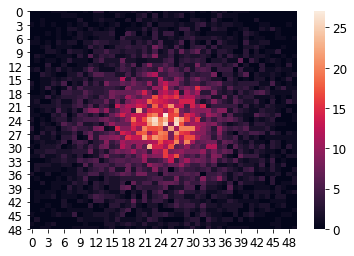

In [8]:
import seaborn as sns
H, xedges, yedges = np.histogram2d(x, y, bins=(50,50))
print(H.shape)
sns.heatmap(H.T)

The last figure shows that the number of houses is larger in lighter areas. In other words, the density of houses is larger in lighter colors.
Next, we will create a T matrix 2500 by 2 which shows different points in 5000 by 5000 area. For example our points are (50,50), (150,50), .... So both x and y change from 50 to 4950 with step=100.

In [9]:
xs = np.arange(50, 5000, 100)
xs.shape
ys=xs

In [10]:
xx, yy = np.meshgrid(xs, ys)
T = np.c_[xx.ravel(), yy.ravel()]
print(T)
T.shape

[[  50   50]
 [ 150   50]
 [ 250   50]
 ...
 [4750 4950]
 [4850 4950]
 [4950 4950]]


(2500, 2)

Next, we calculate the distance of each point to all of the 5 banks (Distance2).

In [11]:
Distance2=np.zeros((2500,5))
for i in range(2500):
    point = T[i,:]
    for j in range (5):
        bank = banks[j,:]
        Distance2[i,j] = np.linalg.norm(point-bank)
print(Distance2)
Distance2.shape

[[3131.29366237 5729.31060425 3479.22405142 4257.34659148  790.56941504]
 [3070.0162866  5657.29617397 3380.08875623 4236.153916    710.63352018]
 [3010.81384346 5586.14357137 3281.0059433  4217.22657679  636.39610307]
 ...
 [3683.06937214 1097.72492001 4622.22889957 3824.26463519 6017.05908231]
 [3758.32409459 1151.08644332 4650.26880943 3922.37173149 6084.81717063]
 [3834.70989776 1210.37184369 4680.27776953 4020.57209859 6153.45431445]]


(2500, 5)

Next, we convert distance to cost based on the values given in the question.

In [12]:
Cost1=np.where(Distance2<500, 1, Distance2)
Cost2=np.where((Cost1<1000) & (Cost1>=500), 3, Cost1)
Cost=np.where(Cost2>=1000, 5, Cost2)
print(Cost)

[[5. 5. 5. 5. 3.]
 [5. 5. 5. 5. 3.]
 [5. 5. 5. 5. 3.]
 ...
 [5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]]


Then, for each point we calculate the minimum cost among the cost for 5 banks.

In [13]:
MinCost=Cost.min(axis=1)
print(MinCost)
print(MinCost.shape)
MinCost2=MinCost.reshape(50,50)

[3. 3. 3. ... 5. 5. 5.]
(2500,)


Here, we need to flip the "MinCost2" vertically. The reason is that now the first row shows the minimum cost for y=50 and the second row shows the values for y=150 and so on. But we need to prepare "MinCost2" matrix in the format to be able to multiply element-wise by H (result is called "Adver") and then provide the heatmap. So, we want to have the first row of MinCost2 be the values for maximum y meaning 4950 in our case.

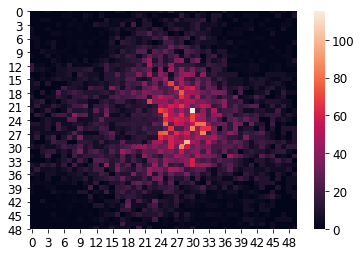

In [14]:
MinCost2=np.flipud(MinCost2)
Adver=np.multiply(H, MinCost2)
sns.heatmap(Adver)

"blu" should focus more on lighter colors in cream/reddish as they have higher values for "density*cost".

2)	Where is the best location to build a new bank to minimize the transportation costs? Providing a heatmap of a measure of “goodness of location” is a plus.

I think based on the "Adver" matrix that we alreay created, the best location for the bank is where the summation of values within a circle of radius 500 has maximum value. In other words, the bank should be located somewhere which leads to maximum reduction in "density*cost".

Next, we will consider a square filter 10 by 10 and we will scan the "Adver" matrix and we find the summation. The best location is where the summation is maximum.

In [15]:
summ=0
CostReduction=0
for i in np.arange(5,45):
    for j in np.arange(5,45):
            arr=Adver[i-5:i+5,j-5:j+5]
            summ=np.sum(arr)
            if summ > CostReduction:
                CostReduction = summ
                iny=i
                inx=j
print(inx)
print(iny)

29
26


The best location for the new bank is x=2900, y=2600 based on the granularity 100 we have chosen.

#### 2) Movie database

We have a dataset of 3000 movies from the internet movie database here. This dataset includes columns such as title, genre, budget, production companies, cast, etc. Using only the information provided in this dataset, answer the following questions. (Dataset may require cleaning first)

In [16]:
import pandas as pd
df=pd.read_csv("imdb.csv")
print(df.head())
print(df.info())
df.describe()

   id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


1)	Which are the genres with the highest number of movies? (Note that a movie may have more than one genre)

In [17]:
df1=df["genres"]
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)
print(df1.head())
print(df1.shape)

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object
(2993,)


In [18]:
data={}
for i in range(df1.shape[0]):
    l=df1[i]
    l=list(eval(l)) 
    for j in range(len(l)):
        key=l[j]['name']
        if key in data:
            data[key]=data[key]+1
        else:
            data[key]=1
print(data)

{'Comedy': 1028, 'Drama': 1531, 'Family': 260, 'Romance': 571, 'Thriller': 789, 'Action': 741, 'Animation': 141, 'Adventure': 439, 'Horror': 301, 'Documentary': 87, 'Music': 100, 'Crime': 469, 'Science Fiction': 290, 'Mystery': 225, 'Foreign': 31, 'Fantasy': 232, 'War': 100, 'Western': 43, 'History': 132, 'TV Movie': 1}


In [19]:
sorted(data.items(), key=lambda x: x[1], reverse=True)

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

Previous output shows the number of movies in each genre in a decreasing order. So, "Drama" has the highest number of the movies (1531 movies).

2)	Which are the genres with the highest average revenue/budget ratio for a movie? (i.e. which genres are the most rewarding ones in terms of income for the company?)

In [20]:
df2=df[['genres','revenue','budget']]
df2['budget'].replace(0, np.nan, inplace=True)
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)
df2['income']=df2['revenue']/df2['budget']
df2=df2.drop(['revenue', 'budget'], axis=1)
print(df2.head(5))
print(df2.shape)

                                              genres     income
0                     [{'id': 35, 'name': 'Comedy'}]   0.879618
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   2.378736
2                      [{'id': 18, 'name': 'Drama'}]   3.967273
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...  13.333333
4  [{'id': 16, 'name': 'Animation'}, {'id': 12, '...   0.407705
(2183, 2)


/Users/maryammohseni/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [21]:
Freq={}
SumIncome={}
for i in range(df2.shape[0]):
    l=df2['genres'][i]
    l=list(eval(l)) 
    for j in range(len(l)):
        key=l[j]['name']
        if key in Freq:
            Freq[key]=Freq[key]+1
            SumIncome[key]=SumIncome[key]+df2['income'][i]
        else:
            Freq[key]=1
            SumIncome[key]=df2['income'][i]
print(Freq)
print(SumIncome)

{'Comedy': 730, 'Drama': 1092, 'Family': 200, 'Romance': 410, 'Thriller': 637, 'Animation': 106, 'Adventure': 374, 'Horror': 243, 'Music': 69, 'Crime': 376, 'Action': 612, 'Science Fiction': 248, 'Mystery': 182, 'Fantasy': 189, 'War': 83, 'Western': 31, 'Foreign': 12, 'History': 105, 'Documentary': 20, 'TV Movie': 1}
{'Comedy': 12727823.009330878, 'Drama': 13747587.012255495, 'Family': 1019267.1336302623, 'Romance': 1047328.7888071989, 'Thriller': 1004679.566458042, 'Animation': 352.46342390168047, 'Adventure': 1022269.5823587604, 'Horror': 1019591.6562124043, 'Music': 383.7861102092786, 'Crime': 1668.5698430429889, 'Action': 1022773.810226265, 'Science Fiction': 904.7109728282882, 'Mystery': 18003.35965813451, 'Fantasy': 623.8440222659323, 'War': 4197827.628024737, 'Western': 135.07934210419873, 'Foreign': 34.17719347426913, 'History': 4200107.577514824, 'Documentary': 50.773370146240715, 'TV Movie': 8.4}


In [22]:
Avg=dict((k, float(SumIncome[k]) / Freq[k]) for k in SumIncome)
print(Avg)
sorted(Avg.items(), key=lambda x: x[1], reverse=True)

{'Comedy': 17435.373985384766, 'Drama': 12589.365395838366, 'Family': 5096.335668151311, 'Romance': 2554.4604605053632, 'Thriller': 1577.2049708917457, 'Animation': 3.325126640581891, 'Adventure': 2733.3411293014983, 'Horror': 4195.850437088084, 'Music': 5.562117539264907, 'Crime': 4.437685752773906, 'Action': 1671.1990363174264, 'Science Fiction': 3.6480281162430974, 'Mystery': 98.91955856117862, 'Fantasy': 3.30076202257107, 'War': 50576.23648222575, 'Western': 4.357398132393508, 'Foreign': 2.8480994561890944, 'History': 40001.02454776023, 'Documentary': 2.538668507312036, 'TV Movie': 8.4}


[('War', 50576.23648222575),
 ('History', 40001.02454776023),
 ('Comedy', 17435.373985384766),
 ('Drama', 12589.365395838366),
 ('Family', 5096.335668151311),
 ('Horror', 4195.850437088084),
 ('Adventure', 2733.3411293014983),
 ('Romance', 2554.4604605053632),
 ('Action', 1671.1990363174264),
 ('Thriller', 1577.2049708917457),
 ('Mystery', 98.91955856117862),
 ('TV Movie', 8.4),
 ('Music', 5.562117539264907),
 ('Crime', 4.437685752773906),
 ('Western', 4.357398132393508),
 ('Science Fiction', 3.6480281162430974),
 ('Animation', 3.325126640581891),
 ('Fantasy', 3.30076202257107),
 ('Foreign', 2.8480994561890944),
 ('Documentary', 2.538668507312036)]

The output of previous cell shows the average revenue/budget ratio for each genre in a descending order. So, "War" genre is the most rewarding one in terms of income for the company. The next most rewarding one is "History" and so on.

3)	Sort the production companies by the number of movies made. (Note that a movie may have more than one production company)

From the development point of view, it is similar to Q.2), instead of number of movies for each genre we need to calculate the number of movies for each company. 

In [23]:
df3=df["production_companies"]
df3 = df3.dropna()
df3 = df3.reset_index(drop=True)
print(df3.head())
print(df3.shape)

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3    [{'name': 'Ghost House Pictures', 'id': 768}, ...
4    [{'name': 'Walt Disney Pictures', 'id': 2}, {'...
Name: production_companies, dtype: object
(2844,)


In [24]:
FreqProdCom={}
for i in range(df3.shape[0]):
    l=df3[i]
    l=list(eval(l)) 
    for j in range(len(l)):
        key=l[j]['name']
        if key in FreqProdCom:
            FreqProdCom[key]=FreqProdCom[key]+1    
        else:
            FreqProdCom[key]=1           
print(FreqProdCom)

{'Paramount Pictures': 161, 'United Artists': 44, 'Metro-Goldwyn-Mayer (MGM)': 84, 'Walt Disney Pictures': 62, 'Bold Films': 4, 'Blumhouse Productions': 18, 'Right of Way Films': 4, 'Ghost House Pictures': 5, 'North Box Productions': 1, 'Jim Henson Productions': 1, 'Jim Henson Company, The': 1, 'Castle Rock Entertainment': 21, 'Twentieth Century Fox Film Corporation': 138, 'Amercent Films': 1, 'American Entertainment Partners L.P.': 2, 'Interscope Communications': 7, 'DreamWorks SKG': 27, 'Jinks/Cohen Company': 1, 'Double Feature Films': 8, 'Jersey Films': 6, 'Nina Saxon Film Design': 2, 'Cruise/Wagner Productions': 5, 'Amblin Entertainment': 23, 'Blue Tulip Productions': 2, 'Ronald Shusett/Gary Goldman': 1, 'Digital Image Associates': 1, 'Hypnopolis': 1, 'Craven-Maddalena Films': 3, 'BenderSpink': 6, 'BBC Films': 30, 'Headline Pictures': 1, 'Magnolia Mae Films': 2, 'Taeoo Entertainment': 1, 'UK Film Council': 11, 'Prescience': 3, 'Aegis Film Fund': 2, 'Kaleidoscope Films': 1, 'Current

In [25]:
sorted(FreqProdCom.items(), key=lambda x: x[1], reverse=True)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23),
 ('Castle Rock Entertainment', 21),
 ('Epsilon Motion Pictures', 21),
 ('Morgan Creek Productions', 21),
 ('Original Film', 21),
 ('Focus 

As we see in previous cell, the number of movies produced by each company is sorted in a decreasing order. For example, "Warner Bros." with 202 movies has the highest number of movies.

4)	Provide a plot of average revenue/budget ratio in different years. (X-axis would be years and Y-axis would be the average revenue/budget ratio)

In [26]:
df4=df[['release_date','revenue','budget']]
print(df4.head())
print(df4.shape)

  release_date   revenue    budget
0      2/20/15  12314651  14000000
1       8/6/04  95149435  40000000
2     10/10/14  13092000   3300000
3       3/9/12  16000000   1200000
4       2/5/09   3923970         0
(3000, 3)


Next, we convert the format of 'release_date' column to "Year-month-day".

In [27]:
from datetime import datetime

df4['release_date'] = pd.to_datetime(df4.release_date, format='%m/%d/%y')
print(df4.head())
print(df4.shape)

  release_date   revenue    budget
0   2015-02-20  12314651  14000000
1   2004-08-06  95149435  40000000
2   2014-10-10  13092000   3300000
3   2012-03-09  16000000   1200000
4   2009-02-05   3923970         0
(3000, 3)


/Users/maryammohseni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df4['budget'].replace(0, np.nan, inplace=True)
df4 = df4.dropna()
df4 = df4.reset_index(drop=True)
df4['income']=df4['revenue']/df4['budget']
df4=df4.drop(['revenue', 'budget'], axis=1)
print(df4.head())
print(df4.shape)

  release_date     income
0   2015-02-20   0.879618
1   2004-08-06   2.378736
2   2014-10-10   3.967273
3   2012-03-09  13.333333
4   1987-08-06   0.407705
(2188, 2)


In [29]:
print(df4['release_date'])

0      2015-02-20
1      2004-08-06
2      2014-10-10
3      2012-03-09
4      1987-08-06
          ...    
2183   2024-03-18
2184   2004-06-17
2185   1996-10-11
2186   2004-01-16
2187   2011-09-22
Name: release_date, Length: 2188, dtype: datetime64[ns]


Based on the output of the previous cell, we have release_date = "2024-03-18" which is a future time. As the "status" column of dataset is "Released", such future "release_date" is impossible. After some investigations, I found out that for "pd.to_datetime" the "origin" parameter by default is "1970-01-01". It means that all of our years in "m/d/y" are converted to years between 1970-2069.

In [30]:
df4['year'] = pd.DatetimeIndex(df4['release_date']).year
df4=df4.drop('release_date', axis=1)
print(df4.head(470))

        income  year
0     0.879618  2015
1     2.378736  2004
2     3.967273  2014
3    13.333333  2012
4     0.407705  1987
..         ...   ...
465   7.403905  1988
466   0.617459  1998
467   0.200000  2010
468   1.880000  2005
469   0.277778  2068

[470 rows x 2 columns]


So, next we will convert years between 2021-2069 to 1921-1969. In other words, we move the origin to 1920.

In [31]:
df4['year'].values[df4['year'] > 2020] = df4['year'].values[df4['year'] > 2020]-100

print(df4.head())
print(df4.shape)

      income  year
0   0.879618  2015
1   2.378736  2004
2   3.967273  2014
3  13.333333  2012
4   0.407705  1987
(2188, 2)


In [32]:
df4=df4.groupby(by="year").mean()
print(df4.head())
print(df4.shape)

         income
year           
1921  10.000000
1924   1.068882
1925   0.001689
1926   2.086239
1927   2.127408
(87, 1)


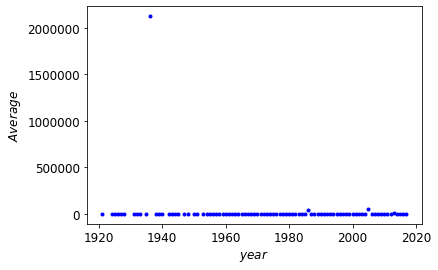

In [33]:
plt.plot(df4.index, df4['income'], "b.") 
plt.xlabel("$year$", fontsize=12)                     
plt.ylabel("$Average$", rotation=90, fontsize=12)                                   
plt.show()

The last figure shows the average revenue/budget ratio for different years. It seems that we have one point with very large ratio and a few other points with big values.

In [34]:
df4.sort_values(by='income', ascending=False)

,income
year,
1936,2.125002e+06
2005,4.997248e+04
1986,4.074855e+04
2013,1.052915e+04
2011,2.865370e+02
...,...
1948,1.790731e+00
1991,1.782322e+00
1950,1.449606e+00


Based on the result in the last cell, that big average ratio is for year 1936. The next big values between 10000 and 50000 are for years 2005, 1986, and 2013. So next we will focus only on ratio between 0 and 300.

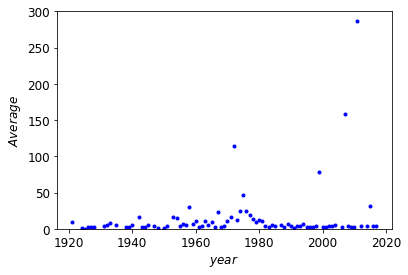

In [35]:
plt.plot(df4.index, df4['income'], "b.") 
plt.xlabel("$year$", fontsize=12)                     
plt.ylabel("$Average$", rotation=90, fontsize=12) 
plt.ylim(0, 300)
plt.show()

5)	Group all movies into different subgroups based on budget, revenue and popularity. (Drop the movies with budget or revenue lower than 10000, these are unknown values).
Explain how you choose the number of these groups. Can you provide an explanation about each group?

In [36]:
df5=df[['popularity','revenue','budget']]
print(df5.shape)
df5=df5[df5['revenue'] >= 10000] 
df5=df5[df5['budget'] >= 10000]
df5 = df5.reset_index(drop=True)
print(df5.shape)
df5.info()

(3000, 3)
(2142, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 3 columns):
popularity    2142 non-null float64
revenue       2142 non-null int64
budget        2142 non-null int64
dtypes: float64(1), int64(2)
memory usage: 50.3 KB


In [37]:
df5.describe()

,popularity,revenue,budget
count,2142.000000,2.142000e+03,2.142000e+03
mean,9.829509,8.874900e+07,3.149244e+07
std,13.864038,1.566499e+08,4.048068e+07
min,0.003013,1.001800e+04,1.117800e+04
25%,5.510417,7.515932e+06,6.000000e+06
50%,8.384303,3.011534e+07,1.700000e+07
75%,11.724694,1.012832e+08,4.000000e+07
max,294.337037,1.519558e+09,3.800000e+08


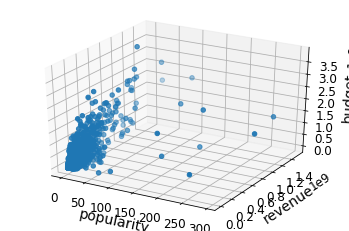

In [38]:
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df5['popularity'], df5['revenue'], df5['budget'])
threedee.set_xlabel('popularity')
threedee.set_ylabel('revenue')
threedee.set_zlabel('budget')
plt.show()

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random
random.seed(42)

In [40]:
X=df5

# Computing 2 performance measures for a range of values of 𝑘
inertias_1 = []
silhouette_avgs = []
max_K = 20
for k in np.arange(1,max_K+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)    
    inertias_1 = inertias_1 + [kmeans.inertia_]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X, kmeans.labels_)]

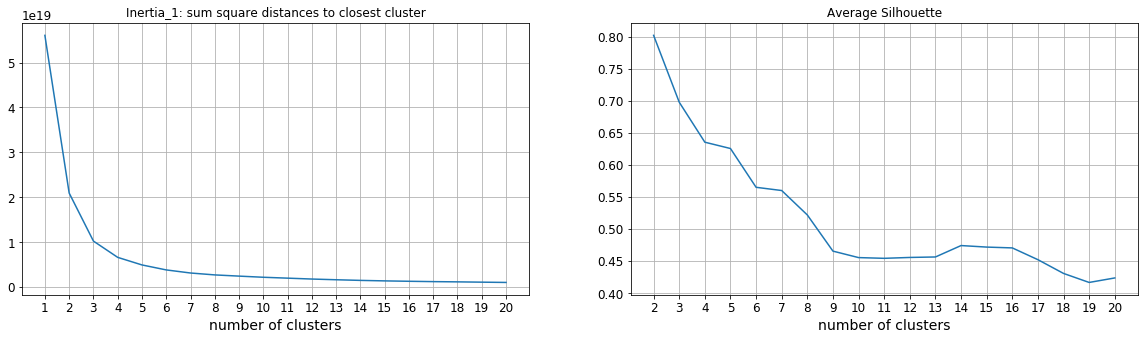

In [41]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("Inertia_1: sum square distances to closest cluster")
plt.plot(np.arange(1,max_K+1),inertias_1)
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.subplot(1,2,2)  
plt.title("Average Silhouette")
plt.plot(np.arange(2,max_K+1), silhouette_avgs)
plt.xticks(np.arange(2,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.show()

I think the best value for number of clusters is 3, because we are 
interested in the minimum value for inertia_1 (left figure) and also maximum value for silhouette (right figure). Actually we are looking at elbow for inertai_1 as it is obvious that decreases with number of cluster.

<Figure size 720x360 with 0 Axes>

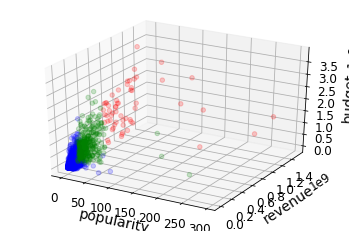

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
K=3
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)   
colors = 'bgryk'
plt.figure(figsize=(10,5))
threedee = plt.figure().gca(projection='3d')

for J in range(K):
    X_J = X[kmeans.labels_==J]
    threedee.scatter(X_J['popularity'], X_J['revenue'],X_J['budget'], c=colors[J], alpha=0.2)
    threedee.set_xlabel('popularity')
    threedee.set_ylabel('revenue')
    threedee.set_zlabel('budget')
plt.show() 

Plotting the figure from another perspective:

<Figure size 720x360 with 0 Axes>

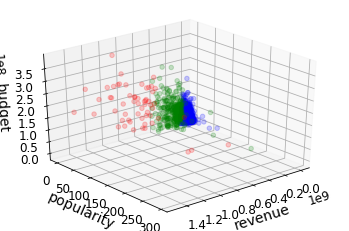

In [43]:
plt.figure(figsize=(10,5))
threedee = plt.figure().gca(projection='3d')
for J in range(K):
    X_J = X[kmeans.labels_==J]
    threedee.scatter(X_J['revenue'], X_J['popularity'],X_J['budget'], c=colors[J], alpha=0.2)
    threedee.view_init(30, 50)
    threedee.set_xlabel('revenue')
    threedee.set_ylabel('popularity')
    threedee.set_zlabel('budget')
plt.show() 

After looking at the both figures, I think the dataset is mainly clustered based on "revenue". The blue cluster shows the movies with low revenue, the green cluster shows the medium revenue and finally the red cluster shows the movies with higher revenue.

6)	We have some users who like to be different and ‘swim against the current’. Find them the most weird movies in terms of runtime, budget, number of cast, etc. Feel free to improvise and combine the columns! Explain your results.

In [44]:
df6=df[['id','budget','runtime','cast']]
print(df6.shape)
df6 = df6.dropna()
df6 = df6.reset_index(drop=True)
print(df6.shape)
df6.info()

(3000, 4)
(2985, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 4 columns):
id         2985 non-null int64
budget     2985 non-null int64
runtime    2985 non-null float64
cast       2985 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 93.4+ KB


In [45]:
df6['NumCast']=pd.Series([0 for x in range(df6.shape[0])])
for i in range(df6.shape[0]):
    l=df6['cast'][i]
    l=list(eval(l))
    df6['NumCast'][i]=len(l)    
df6.info()
df6.head()

/Users/maryammohseni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 5 columns):
id         2985 non-null int64
budget     2985 non-null int64
runtime    2985 non-null float64
cast       2985 non-null object
NumCast    2985 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 116.7+ KB


,id,budget,runtime,cast,NumCast
0,1,14000000,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",24
1,2,40000000,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",20
2,3,3300000,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",51
3,4,1200000,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",7
4,5,0,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",4


In [46]:
df7=df6['id']
df6=df6.drop(['id', 'cast'], axis=1)
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 3 columns):
budget     2985 non-null int64
runtime    2985 non-null float64
NumCast    2985 non-null int64
dtypes: float64(1), int64(2)
memory usage: 70.1 KB


In [47]:
X=df6
# Computing 2 performance measures for a range of values of 𝑘
inertias_1 = []
silhouette_avgs = []
max_K = 20
for k in np.arange(1,max_K+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)    
    inertias_1 = inertias_1 + [kmeans.inertia_]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X, kmeans.labels_)]        

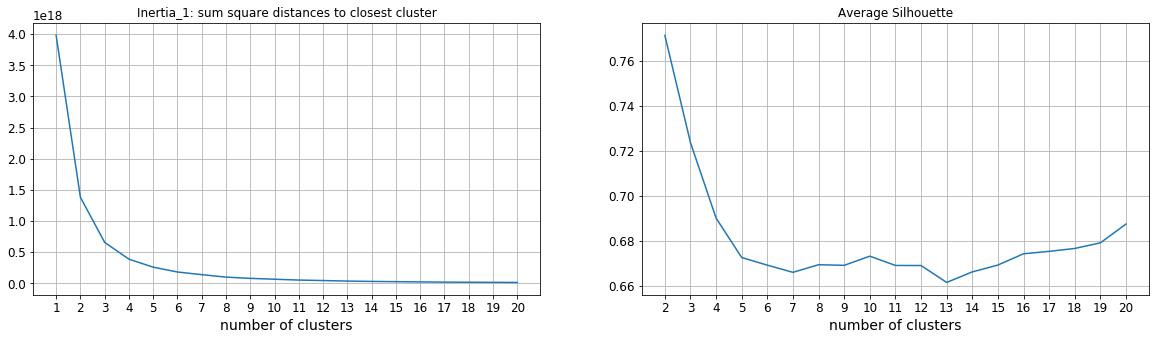

In [48]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("Inertia_1: sum square distances to closest cluster")
plt.plot(np.arange(1,max_K+1),inertias_1)
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()
    
plt.subplot(1,2,2)  
plt.title("Average Silhouette")
plt.plot(np.arange(2,max_K+1), silhouette_avgs)
plt.xticks(np.arange(2,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.show()

I think the best value for number of clusters is 3, because we are 
interested in the minimum value for inertia_1 (left figure) and also maximum value for silhouette (right figure). Actually we are looking at elbow for inertai_1 as it is obvious that decreases with number of cluster.

<Figure size 720x360 with 0 Axes>

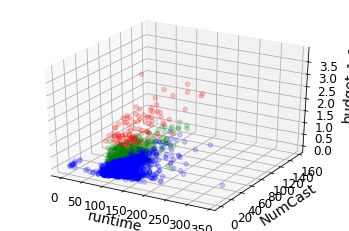

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
K=3
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)   
colors = 'bgryk'
plt.figure(figsize=(10,5))
threedee = plt.figure().gca(projection='3d')

for J in range(K):
    X_J = X[kmeans.labels_==J]
    threedee.scatter(X_J['runtime'], X_J['NumCast'], X_J['budget'], c=colors[J], alpha=0.2)
    threedee.set_xlabel('runtime')
    threedee.set_ylabel('NumCast')
    threedee.set_zlabel('budget')
plt.show() 

Plotting the figure from another perspective:

<Figure size 720x360 with 0 Axes>

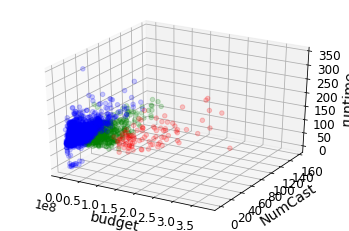

In [50]:
plt.figure(figsize=(10,5))
threedee = plt.figure().gca(projection='3d')

for J in range(K):
    X_J = X[kmeans.labels_==J]
    threedee.scatter(X_J['budget'], X_J['NumCast'], X_J['runtime'], c=colors[J], alpha=0.2)
    threedee.set_xlabel('budget')
    threedee.set_ylabel('NumCast')
    threedee.set_zlabel('runtime')
plt.show() 

Based on the previous two figures, it seems that the most wired movies are:
1. In last figure, the red one which is located right hand side (i.e. having maximum budget).
2. In last figure, the blue one which is located on top (i.e. having maximum runtime).
These two points (movies) are far from other points so we would consider them as outlier (concept of "outlier detection" or "anomaly detection").
Next, we will find the index of these two outliers/movies which is the answer of the question.

In [51]:
column = df6["budget"]
max_value = column.max()
max_index = column.idxmax()
id1=df7[max_index]
print(max_value)
print(id1)

380000000
2136


In [52]:
column = df6["runtime"]
max_value = column.max()
max_index = column.idxmax()
id2=df7[max_index]
print(max_value)
print(id2)

338.0
1212


So the movies with id=2136 and id=1212 are the most weird ones!